In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import sys
import os,fnmatch
import matplotlib as mpl
import matplotlib.cm as cm

In [ ]:
activity_logs=os.getcwd()+"/drive/My Drive/Takeout/daily_aggregations"
fitness_year="2019"



In [ ]:
df_by_day = []
for daily_file in fnmatch.filter(os.listdir(activity_logs),"2019*.csv"):
    #print(daily_file)
    df_raw = pd.read_csv(activity_logs+"/"+daily_file,parse_dates=False)
    try:
      df_raw["activity_dttm"] = pd.to_datetime(daily_file.split(".")[0]+" "+df_raw["Start time"].str[:8]).dt.floor('h')
      df_by_day.append(df_raw[["activity_dttm","Calories (kcal)","Distance (m)","Step count","Walking duration (ms)"]])
      #print(len(df_by_day))
    except:
      pass

df_activities = pd.concat(df_by_day).fillna(0)
df_activities.columns=["activity_dttm","calories_kcal","distance_m","step_count","walking_duration_ms"]
# Reset Index
df_activities.index = pd.RangeIndex(len(df_activities.index))
df_activities

,activity_dttm,calories_kcal,distance_m,step_count,walking_duration_ms
0,2019-01-01 00:00:00,15.958335,0.0,14.0,0.0
1,2019-01-01 00:00:00,15.958335,0.0,1.0,0.0
2,2019-01-01 00:00:00,15.958335,0.0,5.0,0.0
3,2019-01-01 00:00:00,15.958335,0.0,3.0,0.0
4,2019-01-01 01:00:00,15.958335,0.0,3.0,0.0
...,...,...,...,...,...
34843,2019-12-31 22:00:00,16.166666,0.0,0.0,0.0
34844,2019-12-31 23:00:00,16.166666,0.0,0.0,0.0
34845,2019-12-31 23:00:00,16.166666,0.0,0.0,0.0
34846,2019-12-31 23:00:00,16.166666,0.0,0.0,0.0


In [ ]:
df_daily_group = df_activities.groupby([df_activities['activity_dttm'].values.astype('datetime64[D]')]).sum()
df_daily_group["walking_duration_minutes"] = df_daily_group['walking_duration_ms'].apply(lambda x : np.floor(x/60000) )
df_daily_group["activity_day"] = df_daily_group.index
df_daily_group.index = pd.RangeIndex(len(df_daily_group.index))
df_daily_group

,calories_kcal,distance_m,step_count,walking_duration_ms,walking_duration_minutes,activity_day
0,1411.181309,1744.183170,4820.0,1524773.0,25.0,2019-01-01
1,1827.548948,6963.532161,14552.0,6479152.0,107.0,2019-01-02
2,1691.583602,709.848482,4526.0,1531340.0,25.0,2019-01-03
3,2109.482483,8255.541242,18062.0,11582262.0,193.0,2019-01-04
4,1901.632692,4418.090304,10384.0,5830575.0,97.0,2019-01-05
...,...,...,...,...,...,...
358,1555.004822,74.126200,357.0,50850.0,0.0,2019-12-27
359,1738.536655,2727.386804,5078.0,3156689.0,52.0,2019-12-28
360,1965.183119,5844.091932,11022.0,6992133.0,116.0,2019-12-29
361,1831.739049,4494.411021,8696.0,4733914.0,78.0,2019-12-30


##### My Most active five days 

In [ ]:
df_daily_group.nlargest(5,"step_count")[["distance_m","step_count","activity_day"]]

,distance_m,step_count,activity_day
275,47520.369812,70966.0,2019-10-05
106,42790.573301,64950.0,2019-04-19
276,19330.890427,30524.0,2019-10-06
107,17835.932739,29613.0,2019-04-20
5,10893.381753,19854.0,2019-01-06


On 19–20 Apr and 05–06 Oct, I participated in a two day walking event covering a total of 65 KM.

### Weekly Analysis

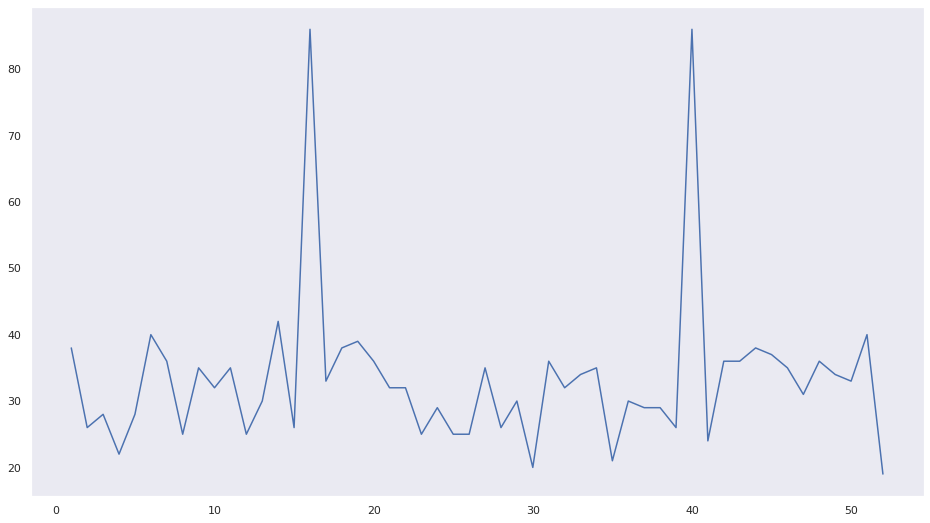

In [ ]:
df_daily_group["week_num"] = df_daily_group.activity_day.dt.weekofyear
df_weekly_group = df_daily_group.groupby("week_num").sum()
df_weekly_group["distance_km"] = df_weekly_group['distance_m'].apply(lambda x : np.floor(x/1000) )
df_weekly_group
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(df_weekly_group["distance_km"])

On an average I walk 25–35 Km in a week. Because of the two outliers from my 65 Km walk, all the weeks are dwarfed in the graph. The average is higher in the warmer parts of the year (weeks 0–20 and 40–52), around 35. During the colder parts of the year, I have been a bit lazy with only a top of 35, fluctuating between 25–30 Km.

The two long walks have dwarfed my regular weeks in the graph. Lets try to analyse the distribution of number of steps in a month using box plot which provides a better view of how distributed the measures are around a median

In [ ]:
df_monthly_group = df_activities.groupby([df_activities['activity_dttm'].values.astype('datetime64[M]'),df_activities['activity_dttm'].values.astype('datetime64[D]')]).sum()
df_monthly_group["activity_day"] = df_monthly_group.index.get_level_values(1)
df_monthly_group.index = df_monthly_group.index.get_level_values(0)
df_monthly_group["month"] = df_monthly_group.index.month
# Adust Steps to a max of 15K to suppress the max outliers
df_monthly_group['step_count_k'] = df_monthly_group['step_count'].apply(lambda x : np.floor(x/1000) if np.floor(x/1000) <= 15 else 15)
df_monthly_group['step_count_k'] = df_monthly_group['step_count_k'].apply(lambda x : x if x >= 2 else 2)
df_monthly_group['weekday'] = df_monthly_group["activity_day"].apply(lambda x : "Y" if x.weekday()<5 else 'N')
df_monthly_group_2019=df_monthly_group["2019"]
df_monthly_group_2019

,calories_kcal,distance_m,step_count,walking_duration_ms,activity_day,month,step_count_k,weekday
2019-01-01,1411.181309,1744.183170,4820.0,1524773.0,2019-01-01,1,4.0,Y
2019-01-01,1827.548948,6963.532161,14552.0,6479152.0,2019-01-02,1,14.0,Y
2019-01-01,1691.583602,709.848482,4526.0,1531340.0,2019-01-03,1,4.0,Y
2019-01-01,2109.482483,8255.541242,18062.0,11582262.0,2019-01-04,1,15.0,Y
2019-01-01,1901.632692,4418.090304,10384.0,5830575.0,2019-01-05,1,10.0,N
...,...,...,...,...,...,...,...,...
2019-12-01,1555.004822,74.126200,357.0,50850.0,2019-12-27,12,2.0,Y
2019-12-01,1738.536655,2727.386804,5078.0,3156689.0,2019-12-28,12,5.0,N
2019-12-01,1965.183119,5844.091932,11022.0,6992133.0,2019-12-29,12,11.0,N
2019-12-01,1831.739049,4494.411021,8696.0,4733914.0,2019-12-30,12,8.0,Y


### Boxplot

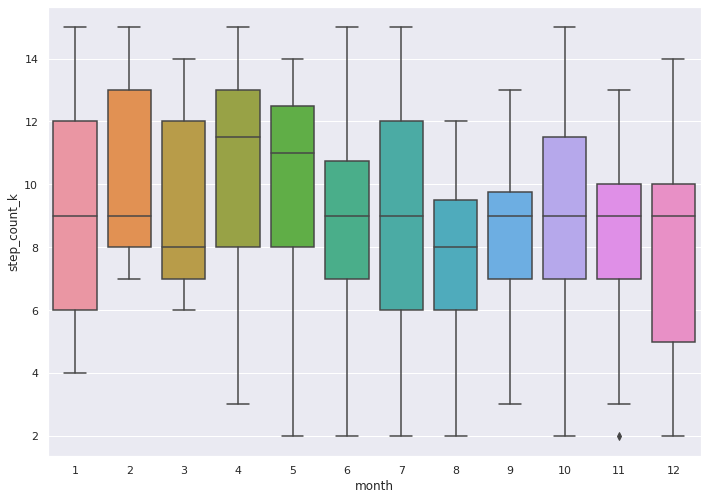

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"])

### Interpreting the boxplot



1.   Jan and Jul I have covered similar distances, 6–12K with a median of 9K
2.   In Feb and March, I walked 8–9K and 7–8K steps more frequently and then covered a range of 9–13K and 8–12K steps less frequently
3.   In Apr and May, the trend reversed. I covered 8–10k less frequently and walked 11–13k more frequently. I have been consistently more active in Apr and May than the previous two months



### Violi Plot

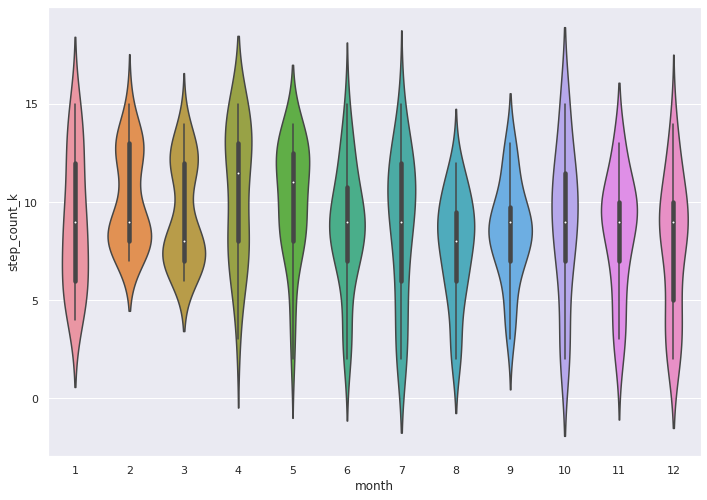

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"])
#https://seaborn.pydata.org/generated/seaborn.violinplot.html  - Check how to set weekend vs weekday
# use a split like ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count", inner="quartile")

### Interpreting the Violinplot



1.   Jan and Jul no longer look the same as in the box plot. In Jan, I have covered 6K more number of days and in July I covered 11K more frequently. This was not evident in the box plot. Overall I have been more active in Jul than Jan
2.   The lower bout in Feb and Mar indicate that I walked 8–9K and 7–8K more frequently
3.   The upper bout in Apr and May indicate that I walked 11–13K more frequently



### Violinplot split by weekdays and weekends

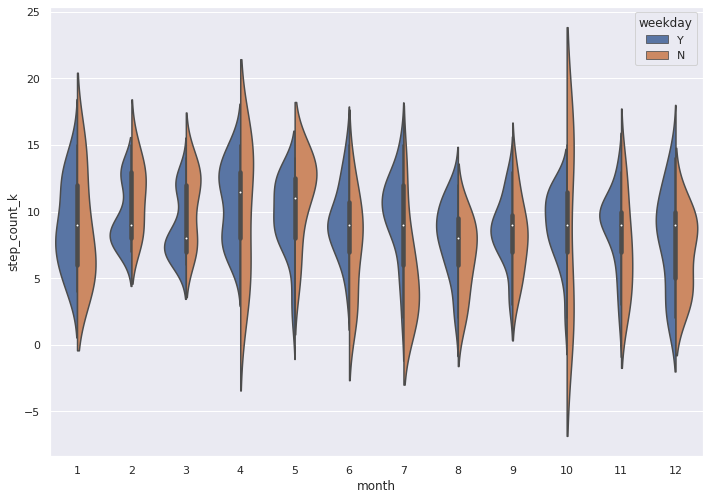

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"],hue=df_monthly_group["weekday"],split=True)

 ### Observations from the split violinplot

1.   In Jan, my activity during weekdays and weekends is almost same
2.   But in Jul, I was not that active on weekends. The weekday bout was above the median and the weekend bout is far below the median at around 4K
3.   In Feb and Mar, activity during weedays and weekends is almost same. In May, I was more active on weekdays than the weekdays
4.   Overall my weekends are less active than weekdays

### Create pivot table for hourly activity

In [ ]:
df_activities["hour"] = df_activities.activity_dttm.dt.hour
df_activities["date"] =  df_activities.activity_dttm.dt.date
df_2019_wk =df_activities[df_activities.activity_dttm.dt.week==51]
weekly_timewheel_data = pd.pivot_table(df_2019_wk,index=["date"],columns=["hour"],values=["step_count"],aggfunc=[np.sum])
weekly_timewheel_data.columns = [  column_name[2] for column_name in weekly_timewheel_data.columns ]
weekly_timewheel_data.index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
weekly_timewheel_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mon,0.0,0.0,0.0,0.0,0.0,1.0,149.0,518.0,946.0,1492.0,864.0,430.0,501.0,3863.0,132.0,1141.0,788.0,1768.0,459.0,1.0,34.0,28.0,26.0,50.0
Tue,10.0,0.0,0.0,25.0,0.0,85.0,245.0,308.0,1039.0,1017.0,341.0,418.0,600.0,1860.0,0.0,0.0,726.0,1436.0,795.0,6.0,24.0,634.0,0.0,71.0
Wed,0.0,2.0,9.0,3.0,0.0,153.0,457.0,416.0,651.0,1136.0,1132.0,103.0,503.0,3930.0,305.0,49.0,769.0,1062.0,680.0,171.0,74.0,9.0,30.0,1.0
Thu,5.0,1.0,1.0,0.0,16.0,1.0,325.0,355.0,757.0,1192.0,105.0,5.0,309.0,3802.0,394.0,31.0,484.0,1660.0,145.0,232.0,2127.0,840.0,329.0,94.0
Fri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1069.0,955.0,882.0,2375.0,1095.0,1004.0,991.0,1037.0,100.0,147.0,15.0,0.0,0.0,0.0
Sat,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,76.0,537.0,701.0,514.0,461.0,931.0,1296.0,967.0,67.0,0.0,253.0,0.0,75.0,0.0,0.0
Sun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,750.0,132.0,183.0,908.0,815.0,846.0,1281.0,1326.0,1692.0,1268.0,0.0,0.0,0.0,37.0,0.0


### Code for plotting a timewheel

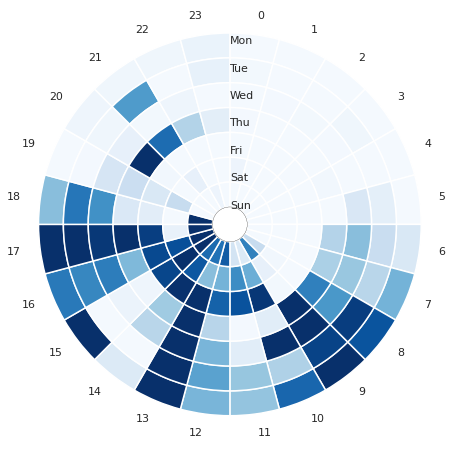

In [ ]:
def pie_heatmap(table, cmap=cm.hot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=1.1*vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)

plt.figure(figsize=(8,8))
pie_heatmap(weekly_timewheel_data, vmin=-20,vmax=1000,inner_r=0.1)
plt.show();

### Observations from timewheel

1.   My active part of the day is between 8 am and 7 pm
2.   Most of my activity is concentrated between the hours 8,9,16,17 during this week, usually my commute time
3.   Activity is high between 13–14 hours, which covers my post lunch walk
4.   My activity on Sunday is very low